In [1]:
#!/usr/bin/env python
# encoding: utf-8
#from scipy.spatial.distance import cdist

#similarity score concat before fc1 
import tldextract
from itertools import combinations
from shutil import which
import torch.nn.functional as F
from statistics import mean


from gensim.models import KeyedVectors
from cleantext import clean
from tqdm import tqdm
from nltk.tokenize import TweetTokenizer
import preprocessor as p 
import numpy as np

import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import LongformerModel, LongformerTokenizer, LongformerConfig
from tqdm import tqdm
tqdm.pandas(desc="my bar!")
import pandas as pd 
import numpy as np 
from collections import defaultdict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
#import wandb
#import numpy as np
from pprint import pprint


from nltk.corpus import stopwords
import preprocessor as p  #pip install tweet-preprocessor
import logging  # Setting up the loggings to monitor gensim
from nltk.stem import WordNetLemmatizer
from string import punctuation as punc

import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
import gensim.models as gsm



import emoji #pip install emoji --upgrade
# Internal dependencies


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torchvision.transforms as transforms
from torch.autograd import Variable

import os
import torch.multiprocessing as mp
import torchvision.transforms as transforms


#os.environ['CUDA_VISIBLE_DEVICES'] = '1, 2, 3' 
#....to install apex...
#pip install -v --no-cache-dir ./

#!/usr/bin/env python
# encoding: utf-8
import time
import torch.optim as optim
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
#from torchnlp.nn import Attention #pip imstall pytorch-nlp

from gensim.models import KeyedVectors
#from fastnode2vec import Graph, Node2Vec
import pandas as pd
import networkx as nx
import os

from torch.utils.data import TensorDataset, random_split
from cleantext import clean
from tqdm import tqdm
from nltk.tokenize import TweetTokenizer
import preprocessor as p 
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import LongformerModel, LongformerTokenizer, LongformerConfig
from tqdm import tqdm
tqdm.pandas(desc="my bar!")
import pandas as pd 
import numpy as np 
from collections import defaultdict

from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
import time
#import numpy as np
from pprint import pprint

from nltk.corpus import stopwords
import preprocessor as p  #pip install tweet-preprocessor
import logging  # Setting up the loggings to monitor gensim
from nltk.stem import WordNetLemmatizer
from string import punctuation as punc

import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.models as gsm
from gensim.test.utils import datapath

import regex 
#pip install emoji --upgrade
# Internal dependencies



import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torchvision.transforms as transforms
from torch.autograd import Variable

import os
import torch.multiprocessing as mp
import torchvision.transforms as transforms
import torch.distributed as dist

from urllib.parse import urlparse
import tldextract


In [3]:
#os.environ['CUDA_VISIBLE_DEVICES'] = '1, 2, 3' 
#....to install apex...
#pip install -v --no-cache-dir ./

def extract_domain(x):
    '''
    e.g. x='http://www.bbc.co.uk'
    '''
    ext = tldextract.extract(x)
    return ext.registered_domain

def retrieveRTMT(_df,n2vRT,n2vMT):
    '''
    #_names: nodes' name in RT or MT network
    '''
    
    dfRT=pd.DataFrame(n2vRT.wv.vectors,index=n2vRT.wv.index2entity)
    dfMT=pd.DataFrame(n2vMT.wv.vectors,index=n2vMT.wv.index2entity)
    RT=dfRT[dfRT.index.isin(_df['user_screen_name'])].values
    MT=dfMT[dfMT.index.isin(_df['user_screen_name'])].values
    
    
    RT=torch.tensor(RT)
    MT=torch.tensor(MT)
    return RT, MT

def prepro(ndf,col):
    
    import re
    def remove_rt(query):
        query=re.sub(r"\brt", "", query)
        return query
    ndf[col]=ndf[col].progress_apply(lambda x: remove_rt(x))

    def tokenizer(_text):
        return TweetTokenizer().tokenize(_text)

    ndf[col]=ndf[col].progress_apply(lambda x:tokenizer(x))

    from nltk.corpus import stopwords
    STOPWORDS=stopwords.words('english')
    def remove_stop(_text):
        return ' '.join([x for x in _text if x not in STOPWORDS])

    ndf[col]=ndf[col].progress_apply(lambda x: remove_stop(x))
    
    def preprocessing(string): 

        text=clean(string,lower=True, no_emails=True,no_numbers=True,no_punct=True,no_digits=False,no_currency_symbols=True,
                   replace_with_number="",
                   no_urls=True,replace_with_url="",
                   replace_with_email="",
                   replace_with_currency_symbol="")

        return text
    ndf[col]=ndf[col].progress_apply(lambda x: preprocessing(x))
    
    def remove_emoji(string):
        p.set_options(p.OPT.EMOJI, p.OPT.SMILEY)
        
        return p.clean(string)
    ndf[col]=ndf[col].progress_apply(lambda x: remove_emoji(x))
    
    ndf.reset_index(inplace=True,drop=True)
    return ndf

torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.enabled = False
np.random.seed(1)


def makefolder(save):
    if  os.path.exists(save) == False:
        os.makedirs(save)
    else:
        print('Floder:',save,'Exsit!')
    return save
def get_intersection(_df,_intersecion):
    for each  in ['source','target']:

        _df=_df[_df[each].isin(_intersecion)]
    return _df

def fast_node2vec(_df,_save,_file,saving_name,epochs):
    '''
    _df:retweetdf,mentiondf
    _save:saving folder path
    _file:csv name, e.g., vaccine, mask
    saving_name: RT or MT
    '''
    
    _tuples=_df.to_records(index=False)

    _lst=list(_tuples)

    _graph = Graph(_lst, directed=True, weighted=True)

    _n2v = Node2Vec(_graph, dim=300, walk_length=100, context=10, p=2.0, q=0.5, workers=-1)
    
    _n2v.train(epochs=epochs)

    _n2v.wv.save(_save+_file+'_'+saving_name+'.wv')
    return _n2v

def updatecol(df1,df2,colname,index):
    df1[colname]=''

    df1.set_index(index,inplace=True)

    df2.set_index(index,inplace=True)

    df1.update(df2)

    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    return df1

def updatecol_seperate(df1,df2,colname,index1,index2):
    df1[colname]=''

    df1.set_index(index1,inplace=True)

    df2.set_index(index2,inplace=True)

    df1.update(df2)

    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    return df1



def preproNetwork(_df,nettype,topn,Need,_name):
    '''
    target: 'retweeted_status_screen_name' or 'user_mentions_screen_names'
    return topn indegree dataframe
    _name: QAnon or Biden
    '''
    if nettype=='RT':
        target= 'retweeted_status_screen_name' 
    elif nettype=='MT':
        target= 'user_mentions_screen_names'
        
    file=_name
    save='../Project2/'+file+'_data_processed/'
    makefolder(save)
        
    #_df=_df.rename(columns={'user_screen_name':'users'})
    _df=_df[['user_screen_name',target]]
    _df.dropna(subset=[target],inplace=True)
    _df[target]=_df[target].str.replace('\'','')
    _df[target]=_df[target].apply(lambda x: x.split(','))
    _df=_df.explode([target])
    _df=_df[['user_screen_name',target]]
    #_df.columns=['source','target']
    
    
    _df=_df.explode([target])
    
    G=nx.from_pandas_edgelist(_df,source='user_screen_name',target=target,create_using=nx.DiGraph())

    nx.write_gexf(G, save+nettype+ '.gexf')
    mdf=pd.DataFrame(G.in_degree)
    mdf.columns=['Allusers','indegree']
    kdf=mdf.sort_values('indegree',ascending=False).head(topn)
    kdf.to_csv('../Project2/QAnon_data_processed/top'+str(topn)+nettype+'indegree.csv',index=None)
    #print(_df.columns)
    #print(kdf.columns)
    ndf=updatecol_seperate(_df,kdf,'indegree','user_screen_name','Allusers')
    ldf=ndf[ndf['indegree']!='']
    ldf['indegree']=ldf['indegree'].astype(int)
    ldf=ldf.sort_values('indegree',ascending=False)
    
    #produce node2vec
    if Need==True:
        __df=_df.groupby(['user_screen_name',target]).size().reset_index()
        __df=__df.rename(columns={0:'weight'})
        n2v=fast_node2vec(__df, save, file+'_'+nettype+'_weighted',nettype,500)
    else:
        n2v=None
    return ldf, n2v

def rank_indegree(_df1,_indegree,usertype):
    _df1p=updatecol_seperate(_df1,_indegree,'indegree',usertype,'user_screen_name')
    _df1p['indegree']=pd.to_numeric(_df1p['indegree'])
    #df1p['indegree']=df1p['indegree'].astype(int)
    _df1p=_df1p.sort_values('indegree',ascending=False).drop_duplicates(usertype)
    #print(df1p.shape)
    return _df1p


def get_textdf(_df):
    #_df=_df[['user_screen_name','text','news']]
    #_df=_df.groupby(by='user_screen_name').agg(text=("text", lambda x: ",".join(set(x))))
    #_df.reset_index(inplace=True)
    
    _t1=_df.groupby(by='user_screen_name').agg(text=("text", lambda x: ",".join(set(x))))

    _t2=_df.groupby(by='user_screen_name').agg(news=("news", lambda x: ",".join(set(x))))
    
    _t1['news']=''
    
    _t1.update(_t2)
    
    _t1.reset_index(inplace=True)
    return _t1

class cos_feature:
    def __init__(self, text, news):
        self.long_roberta = long_roberta
        self.text = text
        self.news = news

    def cos_similarity(self):

        with torch.no_grad():
            embedding = self.long_roberta(self.text)[0]
        return embedding

    def emb_similarity(self):

        emb1 = self.cos_similarity(self.text)
        emb2 = self.cos_similarity(self.news)
        emb1 = emb1.cpu().detach().numpy()
        emb2  = emb2.cpu().detach().numpy()
        print('tweet:',emb1.shape)
        print('news:', emb2.shape)
        Y = cdist(emb1[0], emb2[0], 'cosine')[0][0]
        cos_sim = 1.0 - Y
        print('similarity:',cos_sim)
        return cos_sim

class ROBERTALSTMSentiment(nn.Module):
        def __init__(self,
                    long_roberta,
                    hidden_dim,
                    output_dim,
                    n_layers,
                    bidirectional,
                    dropout):
            
            super().__init__()
            
            self.long_roberta = long_roberta
            
            embedding_dim = long_roberta.config.to_dict()['hidden_size'] #768
                
            self.rnn = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers = n_layers,
                            bidirectional = bidirectional,
                            batch_first = True,
                            dropout = 0 if n_layers < 2 else dropout)
            self.dropout = nn.Dropout(dropout)
            self.attn_fc = Attention(hidden_dim * 2 if bidirectional else hidden_dim) #attention layer from torchnlp
            self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)


        def forward(self, text):
            with torch.no_grad():
                embedded = self.long_roberta(text)[0]
            lstm_out, (hidden, c_n) = self.rnn(embedded)

            if self.rnn.bidirectional: #add dropout
                hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
            else:
                hidden = self.dropout(hidden[-1,:,:])
  
            attn_out = self.attn_fc(hidden.unsqueeze(1), lstm_out)
           
            return attn_out[0].squeeze(1)

# Tokenize all of the sentences and map the tokens to thier word IDs.
def token_id_twt(sentences):
        input_ids = []
        attention_masks = []

        # For every sentence...
        for sent in sentences:
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = longformer_tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 4000,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                truncation=True, #explicitely truncate examples to max length. #my add
                                return_tensors = 'pt',     # Return pytorch tensors.
                        )

            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])
            #print(type(input_ids[0]), input_ids[0], input_ids[0].size())
            #sys.exit()

            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])

        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        #labels = torch.tensor(labels)

    #     # Print sentence 0, now as a list of IDs.
    #     print('Original: ', sentences_train[0])
    #     print('Token IDs:', input_ids_train[0])
        return input_ids, attention_masks

class NetworkMLP(nn.Module):
    def __init__(self):
        super(NetworkMLP, self).__init__() 
        self.fc1 = nn.Linear(300, 150)
            
    def forward(self, X):
        z1 = self.fc1(X)
        return z1 

class JointModel(nn.Module):
    
    def __init__(self,hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.model_net = NetworkMLP()
        self.model_twt = ROBERTALSTMSentiment(long_roberta, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
        self.fc1 = nn.Linear(600, 600)
        self.fc2 = nn.Linear(600, output_dim) #original
        self.dropout = nn.Dropout(dropout)


    def forward(self, x_t): 
        prediction_twt = self.model_twt(x_t)
        #prediction_twtNews = self.model_twt(x_tNews)
       
        #concat_pred = torch.cat((prediction_twt, prediction_twtNews), 1)
        output = self.fc1(prediction_twt)
        
        output = self.dropout(output) # add dropout
        output = self.fc2(F.relu(output)) #original
        #output = self.dropout(output)#add dropout
        #output = self.fc3(F.relu(output))
        return output
        
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    #rounded_preds = torch.round(torch.sigmoid(preds))
    #rounded_preds = torch.round(preds)
    correct = (preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    
    from sklearn.metrics import f1_score
    macro_f1 = f1_score(y.to("cpu"), preds.to("cpu"), average='macro')
    #print("macro_f1", macro_f1)

    return acc, macro_f1


def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.train()
    for step, batch in enumerate(iterator):    
    #for batch in iterator:
        #print("batch", batch)
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        #   b_input_ids = batch[0].to(device)
        #   b_input_mask = batch[1].to(device)
        #   b_labels = batch[2].to(device)

        optimizer.zero_grad()
        
        #netRT = batch[0].to(device)
        #netMT = batch[1].to(device)
        #feature1=batch[0]
        #print('feature1:',feature1)
        #feature2=batch[1]
        #cosine_score=emb_similarity(feature1, feature2)
        #cosine_score_view=cosine_score.view(cosine_score.size()[0],1)

        twt = batch[0].to(device)
        #news= batch[1].to(device)

        #print('text.size:',twt.size())
        #print('news.size:',news.size())

        #cosine_similarity=cosine_similarity.to(device)
        label = batch[1].to(device)

        #print("label", label, type(label),label.size()) #torch.Size([32])
        #label = label.unsqueeze(1)
        #print("label", label, type(label),label.size())
        #predictions = model(batch.text).squeeze(1)
        #predictions = model(text)
        predictions = model(twt)#,cosine_similarity)

        #cosine_score_view=cosine_score.view(cosine_score.size()[0],1)



        #print('cosine_similarity.size:',cosine_score.size())
        #predictions=torch.cat((predictions,cosine_score_view), dim = 1)
        #print('predictions.size:',predictions.size())
        loss = criterion(predictions, label)
    
        acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.eval()
    
    with torch.no_grad():
    
        #for batch in iterator:
        for step, batch in enumerate(iterator):    
            #des = batch[0].to(device)
            #loc = batch[1].to(device)
            #netRT = batch[0].to(device)
            #netMT = batch[1].to(device)
            twt = batch[0].to(device)
            #news= batch[1].to(devifce)
            label = batch[1].to(device)
            #predictions = model(batch.text).squeeze(1)
            predictions = model(twt)
            #loss = criterion(predictions, batch.label)
            loss = criterion(predictions, label)
            #acc = binary_accuracy(predictions, batch.label)
            acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs





if __name__ == '__main__':
    
    path = '../Project2/QAnon/'
    file_name = 'QAnon'
    smaller_sample =500
    
    
    name1 , name2 = 'pro-QAnon','anti-QAnon'
    #if (name1 != 'badbots') | (name2 != 'badhumans'):
    print('name1:',name1)
    print('name2:',name2)
    #name1='badbots'
    #name2='badhumans'#'badhumans'#'goodbots'
    
    
    #news=pd.read_csv(path+file_name+'urlsNews.csv')
    ndf=df=pd.read_csv('../Project3/gf.csv')
    df=df[df['news'].notna()]
    
    modularity=pd.read_csv(path+file_name+'_networkx.csv')
    
    modularity = modularity.rename(columns={'Id':'user_screen_name'})
   
    badwords=["Please click here if you are not redirected","That’s an error.\n\nWe're sorry","This page appears when Google automatically","Sorry, the page you're looking for cannot be","Forbidden\n\nYou don't","ERROR_NEWS","Not Found\n\n","Subscribe\n\nGet the","We've detected you are on","You are here » Home » New Search"]

    for each in tqdm(badwords):
        df=df[~df['news'].str.contains(each)]
    print(df.shape)
    df['tokens']=df['news'].str.split()
    #print(news[news['tokens'].str.len()>10].shape)
    df=df[df['tokens'].str.len()>30]
    print('# of length of news >30',df.shape)

   
    rank=0
    topn=1000000
    #n2vRT = KeyedVectors.load('../Project2/QAnon_data_processed/QAnon_RT_weighted_RT.wv')
    #n2vMT = KeyedVectors.load('../Project2/QAnon_data_processed/QAnon_MT_weighted_MT.wv')

    #indegree=pd.read_csv('../Project2/QAnon_data_processed/top'+str(topn)+'RT'+'indegree.csv')
    
    #ndf.reset_index(inplace=True)

    
    nodes1=modularity[modularity['modularity_class']==0]['user_screen_name'].drop_duplicates().tolist()# Pro-QAnon
    nodes2=modularity[modularity['modularity_class']==3]['user_screen_name'].drop_duplicates().tolist()# Anti-QAnon

    df1=df[df['user_screen_name'].isin(nodes1)]
    df2=df[df['user_screen_name'].isin(nodes2)]

    print(name1,len(set(df1['user_screen_name'])))
    print(name2,len(set(df2['user_screen_name'])))


    df1=get_textdf(df1)
    df2=get_textdf(df2)

    df1['labels']=1#democrat
    df2['labels']=0#republics

    
    num_lst=[500,name2,name1]
    Nums=[smaller_sample, len(set(df2['user_screen_name'])), len(set(df1['user_screen_name']))]
    num = min(Nums)
    print(num_lst[Nums.index(num)],' is the smallest!')


    # when we have news we use this part
    df1p=rank_indegree(df1,modularity,'user_screen_name')
    df1p=df1p.head(num)
    df1p=prepro(df1p,'news')
    df1p=prepro(df1p,'text')



    df2=rank_indegree(df2,modularity,'user_screen_name')
    df2=df2.head(num)
    df2=prepro(df2,'news')
    df2=prepro(df2,'text')

    kdf=df=pd.concat([df1p,df2])
    print('Processing finished!')

name1: pro-QAnon
name2: anti-QAnon


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


(38148, 40)
# of length of news >30 (37169, 41)
pro-QAnon 19937
anti-QAnon 1480
500  is the smallest!


my bar!: 100%|██████████| 500/500 [00:00<00:00, 41181.19it/s]

Processing finished!


In [4]:
np.random.seed(42)
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_left = df[~msk]
np.random.seed(42)
msk = np.random.rand(len(df_left)) < 0.5
df_valid = df_left[msk]
df_test = df_left[~msk]

print(df.shape)
print('train:',df_train.shape)
print('validation',df_valid.shape)
print('test',df_test.shape)

# Get the lists of sentences and their labels.
labels_train = torch.tensor(df_train['labels'].to_numpy())
labels_valid = torch.tensor(df_valid['labels'].to_numpy())
labels_test = torch.tensor(df_test['labels'].to_numpy())


sentences_train_news = np.array(df_train['news'])
sentences_valid_news = np.array(df_valid['news'])
sentences_test_news = np.array(df_test['news'])
#print(type(sentences_valid_loc))
print('news & text finshed!')

(1000, 5)
train: (801, 5)
validation (102, 5)
test (97, 5)
news & text finshed!


In [5]:
smaller_sample = 500
batch_size = 16

savingname='Binary_Pro_VS_Anti_QAnon_NEWS_weighted_directed_batch'+str(batch_size)+'TokenLength>30'+'Token=4000'

#savingname='degreeRank'+name1+'VS'+name2+'_Health_TEXT_weighted_directed_batch'+str(batch_size)+'violinIndex'+'TokenLength>30'+'Token=4000'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Training')
print('Device:',device)
which_time = 0
N_EPOCHS = 10
HIDDEN_DIM = 300 
OUTPUT_DIM = 3
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5 


Training
Device: cuda:0


In [6]:
# Get the lists of sentences and their labels.
_target='news'
sentences_train_twt = np.array(df_train[_target])
labels_train = torch.tensor(df_train['labels'].to_numpy())
#print(type(sentences_train_loc))

sentences_valid_twt = np.array(df_valid[_target])
labels_valid = torch.tensor(df_valid['labels'].to_numpy())
#print(type(sentences_valid_loc))

sentences_test_twt = np.array(df_test[_target])
labels_test = torch.tensor(df_test['labels'].to_numpy())
#print(type(sentences_valid_loc))


from transformers import LongformerModel, LongformerTokenizer, LongformerConfig
longformer_tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096', do_lower_case=True)
#The first four features are in tokenizer.encode, but I’m using tokenizer.encode_plus to get the fifth item (attention masks).

# Tokenize all of the sentences and map the tokens to thier word IDs.
def token_id_twt(sentences):
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in sentences:
        # `encode_plus` will:
        #   (1) Tokenize the sentence.
        #   (2) Prepend the `[CLS]` token to the start.
        #   (3) Append the `[SEP]` token to the end.
        #   (4) Map tokens to their IDs.
        #   (5) Pad or truncate the sentence to `max_length`
        #   (6) Create attention masks for [PAD] tokens.
        encoded_dict = longformer_tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 4000,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            truncation=True, #explicitely truncate examples to max length. #my add
                            return_tensors = 'pt',     # Return pytorch tensors.
                       )

        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'])
        #print(type(input_ids[0]), input_ids[0], input_ids[0].size())
        #sys.exit()

        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    #labels = torch.tensor(labels)

#     # Print sentence 0, now as a list of IDs.
#     print('Original: ', sentences_train[0])
#     print('Token IDs:', input_ids_train[0])
    return input_ids, attention_masks
input_ids_train_twt, attention_masks_train_twt = token_id_twt(sentences_train_twt)
input_ids_valid_twt, attention_masks_valid_twt = token_id_twt(sentences_valid_twt )
input_ids_test_twt, attention_masks_test_twt = token_id_twt(sentences_test_twt)

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [7]:
from torch.utils.data import TensorDataset, random_split
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids_train_twt, labels_train)
val_dataset = TensorDataset(input_ids_valid_twt, labels_valid)
test_dataset = TensorDataset(input_ids_test_twt, labels_test)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# #print ('Current cuda device ', torch.cuda.current_device())
# print ('Current cuda device ', device)
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16#32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )


long_roberta = LongformerModel.from_pretrained('allenai/longformer-base-4096', gradient_checkpointing=True)
#####....Longformer encoding for Tweets
from torchnlp.nn import Attention #pip imstall pytorch-nlp
class ROBERTALSTMSentiment(nn.Module):
    def __init__(self,
                 long_roberta,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.long_roberta = long_roberta
        
        embedding_dim = long_roberta.config.to_dict()['hidden_size'] #768
              
        self.rnn = nn.LSTM(embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = 0 if n_layers < 2 else dropout)
        
        
        
        self.dropout = nn.Dropout(dropout)
        self.attn_fc = Attention(hidden_dim * 2 if bidirectional else hidden_dim) #attention layer from torchnlp
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        #self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, hidden_dim)
        #self.fc1 = nn.Linear(150, output_dim) 
        #self.fc1 = nn.Linear(hidden_dim, output_dim) 
        #self.fc2 = nn.Linear(50, output_dim)

    def forward(self, text):
        
        #text = [batch size, sent len]
        #print("text", text.size()) #torch.Size([32, 50])       
        with torch.no_grad():
            embedded = self.long_roberta(text)[0]
                
        #embedded = [batch size, sent len, emb dim]
        #print("embedded", type(embedded), embedded.size()) #torch.Size([32, 50, 768])
        #embedded = self.dropout(embedded) #add dropout...don't use it...dropout layer after an pre-trained embedding, that the weights are not learnt during training
        lstm_out, (hidden, c_n) = self.rnn(embedded) #for lstm
        
        #hidden = [n layers * n directions, batch size, hid dim]
        #print("hidden before", type(hidden), hidden.size()) #torch.Size([4, 32, 256])
        if self.rnn.bidirectional: #add dropout
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
        
        attn_out = self.attn_fc(hidden.unsqueeze(1), lstm_out)
        return attn_out[0].squeeze(1)
class BERTLSTMSentiment(nn.Module):
    def __init__(self,
                 bert,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.bert = bert
        
        embedding_dim = bert.config.to_dict()['hidden_size'] #768
              
        self.rnn = nn.LSTM(embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = 0 if n_layers < 2 else dropout)
        
        
        
        self.dropout = nn.Dropout(dropout)
        self.attn_fc = Attention(hidden_dim * 2 if bidirectional else hidden_dim) #attention layer from torchnlp
        #self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        #self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, hidden_dim)
        #self.fc1 = nn.Linear(150, output_dim) 
        #self.fc1 = nn.Linear(hidden_dim, output_dim) 
        #self.fc2 = nn.Linear(50, output_dim)
    
    def attention(self, rnn_out, state):
        #print("rnn_out", rnn_out.size())        
        #print("state", state.size()) 
        state = state.unsqueeze(2)
        #print("state", state.size())
        # (batch, seq_len, cell_size) * (batch, cell_size, 1) = (batch, seq_len, 1)
        weights = torch.bmm(rnn_out, state)
        #print("weights", weights.size()) #torch.Size([150, 13, 1])
        #weights = torch.nn.functional.softmax(weights.squeeze(2)).unsqueeze(2)
        weights = F.log_softmax(weights.squeeze(2),dim = 1).unsqueeze(2)
         #F.log_softmax(x, dim = 1)
        #print("weights2 :", weights.size()) #torch.Size([150, 13, 1])
        # (batch, cell_size, seq_len) * (batch, seq_len, 1) = (batch, cell_size, 1)
        return torch.bmm(torch.transpose(rnn_out, 1, 2), weights).squeeze(2)
    # end method attention

    
    def forward(self, text):
        
        #text = [batch size, sent len]
        #print("text", text.size()) #torch.Size([32, 50])       
        with torch.no_grad():
            embedded = self.bert(text)[0]
                
        #embedded = [batch size, sent len, emb dim]
        #print("embedded", type(embedded), embedded.size()) #torch.Size([32, 50, 768])
        #embedded = self.dropout(embedded) #add dropout...don't use it...dropout layer after an pre-trained embedding, that the weights are not learnt during training
        lstm_out, (hidden, c_n) = self.rnn(embedded) #for lstm
        
        #hidden = [n layers * n directions, batch size, hid dim]
        #print("hidden before", type(hidden), hidden.size()) #torch.Size([4, 32, 256])
        if self.rnn.bidirectional: #add dropout
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
        
        return hidden

class NetworkMLP(nn.Module):
    def __init__(self):
        super(NetworkMLP, self).__init__() 
        self.fc1 = nn.Linear(4000, 150)
        
    def forward(self, X):
        #print(X.size()) # torch.Size([32, 300])
        z1 = self.fc1(X)
        #print('z1', z1, z1.size()) # torch.Size([32, 150])
        #h1 = F.relu(z1) 
        return z1 
        #return h1
class JointModel(nn.Module):
    #def __init__(self):
    def __init__(self,
                 long_roberta,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
    
        #super(JointModel, self).__init__()
        super().__init__()
        
        self.model_net = NetworkMLP()
        self.model_twt = ROBERTALSTMSentiment(long_roberta,
                         HIDDEN_DIM,
                         OUTPUT_DIM,
                         N_LAYERS,
                         BIDIRECTIONAL,
                         DROPOUT)
        self.fc1 = nn.Linear(600 if bidirectional else (hidden_dim * 3 +150), 600)
        self.fc2 = nn.Linear(600, output_dim) #original
#         self.fc2 = nn.Linear(900, 200) #200
#         self.fc3 = nn.Linear(200, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x_t): 
       
        #print(prediction_loc, prediction_loc.size()) 
        #prediction_net = self.model_net(x_n)
        #print('prediction_net:', prediction_net.size()) 
        prediction_twt = self.model_twt(x_t)
        #print('prediction_twt:',prediction_twt.size())
        #concat_pred = torch.cat((prediction_net, prediction_twt), 1) #concat with dim= 1
        #print('concat_pred:', concat_pred.size()) #torch.Size([1, 6])
        output = self.fc1(prediction_twt)
        output = self.dropout(output) # add dropout
        output = self.fc2(F.relu(output)) #original
#         output = self.dropout(output)#add dropout
#         output = self.fc3(F.relu(output))
        return output
    
# HIDDEN_DIM = 256
# OUTPUT_DIM = 3
# N_LAYERS = 2
# BIDIRECTIONAL = True
# DROPOUT = 0.25

#HIDDEN_DIM = 256 #original

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


###In order to freeze paramers (not train them) we need to set their requires_grad attribute to False. To do this, we simply loop through all of the named_parameters in our model and if they're a part of the bert transformer model, we set requires_grad = False.



def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    #rounded_preds = torch.round(torch.sigmoid(preds))
    #rounded_preds = torch.round(preds)
    correct = (preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    
    from sklearn.metrics import f1_score
    macro_f1 = f1_score(y.to("cpu"), preds.to("cpu"), average='macro')
    #print("macro_f1", macro_f1)

    return acc, macro_f1
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.train()
    for step, batch in enumerate(iterator):    
    #for batch in iterator:
        #print("batch", batch)
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
#         b_input_ids = batch[0].to(device)
#         b_input_mask = batch[1].to(device)
#         b_labels = batch[2].to(device)

        optimizer.zero_grad()
        #des = batch[0].to(device)
        #loc = batch[1].to(device)
        net = batch[0].to(device)
        #twt = batch[1].to(device)
        label = batch[1].to(device)
        #print("label", label, type(label),label.size()) #torch.Size([32])
        #label = label.unsqueeze(1)
        #print("label", label, type(label),label.size())
        #predictions = model(batch.text).squeeze(1)
        #predictions = model(text)
        predictions = model(net)
        #pred = model(text)
        #print("pred", pred.size()) #torch.Size([32, 3])
        #predictions = torch.argmax(pred, dim = 1)
        #print("predictions", predictions, predictions.size()) #torch.Size([32, 3])
        #print('label',label)
        #loss = criterion(predictions, batch.label)
        loss = criterion(predictions, label)
        #print("loss", loss)
        #acc = binary_accuracy(predictions, batch.label)
        acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)
        #print("acc", acc)
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    epoch_macro = 0
    model.eval()
    
    with torch.no_grad():
    
        #for batch in iterator:
        for step, batch in enumerate(iterator):    
            #des = batch[0].to(device)
            #loc = batch[1].to(device)
            net = batch[0].to(device)
            #twt = batch[1].to(device)
            label = batch[1].to(device)

            #predictions = model(batch.text).squeeze(1)
            predictions = model(net)
            #loss = criterion(predictions, batch.label)
            loss = criterion(predictions, label)
            #acc = binary_accuracy(predictions, batch.label)
            acc, macro_f1 = binary_accuracy(torch.argmax(predictions, dim = 1), label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            epoch_macro += macro_f1.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_macro / len(iterator)
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

    
def save_plots(train_losses, val_losses, train_f1, val_f1, train_accs, val_accs,test_accs,test_f1s):
    """Plot

        Plot two figures: loss vs. epoch and accuracy vs. epoch
    """
    n = len(train_losses)
    xs = np.arange(1,n+1,1)
    xs = xs.astype(int)

    # plot train and val losses
    fig, ax = plt.subplots()
    ax.plot(xs, train_losses, '--', linewidth=2, label='train loss')
    ax.plot(xs, val_losses, '-', linewidth=2, label='validation loss')
    #ax.set_xlim(0, 10)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend(loc='upper right')
    plt.savefig('../Project2/'+file_name+'/figs/'+savingname+'_Loss.png')

    # plot train and val f1-score
    #plt.clf()
    fig, ax = plt.subplots()
    ax.plot(xs, train_f1, '--', linewidth=2, label='train')
    ax.plot(xs, val_f1, '-', linewidth=2, label='validation')
    ax.plot(xs, test_f1s, '-', linewidth=2, label='test')
    
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Macro-avg F1")
    ax.legend(loc='lower right')
    plt.savefig('../Project2/'+file_name+'/figs/'+savingname+'_Macro-avgF1.png')
    
    # plot train and val accuracy
    #plt.clf(/
    fig, ax = plt.subplots()
    ax.plot(xs, train_accs, '--', linewidth=2, label='train')
    ax.plot(xs, val_accs, '-', linewidth=2, label='validation')
    ax.plot(xs, test_accs, '-', linewidth=2, label='test')
    #ax.set_xlim(0, 10)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.legend(loc='lower right')
    plt.savefig('../Project2/'+file_name+'/figs/'+savingname+'_ACC.png')

cuda:0


Some weights of LongformerModel were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['longformer.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/3 [00:00<?, ?it/s]

The model has 155,436,612 trainable parameters


wandb: Currently logged in as: lawrencexu (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 1
Epoch: 01 | Epoch Time: 9m 29s
	Train Loss: 0.668 | Train Acc: 62.38 | Train macro-avg-f1: 54.07%
	 Val. Loss: 0.427 |  Val. Acc: 84.82 |  Val. macro-avg-f1: 65.62%
	 Aver. ACC: 84.82%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 02 | Epoch Time: 9m 27s
	Train Loss: 0.358 | Train Acc: 87.50 | Train macro-avg-f1: 86.77%
	 Val. Loss: 0.428 |  Val. Acc: 82.74 |  Val. macro-avg-f1: 57.91%
	 Aver. ACC: 83.78%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 03 | Epoch Time: 9m 25s
	Train Loss: 0.272 | Train Acc: 90.69 | Train macro-avg-f1: 90.27%
	 Val. Loss: 0.506 |  Val. Acc: 80.95 |  Val. macro-avg-f1: 63.59%
	 Aver. ACC: 82.84%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 4
Epoch: 04 | Epoch Time: 9m 24s
	Train Loss: 0.190 | Train Acc: 94.73 | Train macro-avg-f1: 94.48%
	 Val. Loss: 0.232 |  Val. Acc: 91.07 |  Val. macro-avg-f1: 74.16%
	 Aver. ACC: 84.90%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 05 | Epoch Time: 9m 25s
	Train Loss: 0.149 | Train Acc: 95.10 | Train macro-avg-f1: 94.75%
	 Val. Loss: 0.390 |  Val. Acc: 82.44 |  Val. macro-avg-f1: 70.13%
	 Aver. ACC: 84.40%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 06 | Epoch Time: 9m 24s
	Train Loss: 0.125 | Train Acc: 96.81 | Train macro-avg-f1: 96.51%
	 Val. Loss: 0.237 |  Val. Acc: 91.96 |  Val. macro-avg-f1: 75.65%
	 Aver. ACC: 85.66%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 7
Epoch: 07 | Epoch Time: 9m 24s
	Train Loss: 0.136 | Train Acc: 96.08 | Train macro-avg-f1: 95.78%
	 Val. Loss: 0.205 |  Val. Acc: 94.64 |  Val. macro-avg-f1: 77.09%
	 Aver. ACC: 86.95%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 08 | Epoch Time: 9m 24s
	Train Loss: 0.123 | Train Acc: 95.22 | Train macro-avg-f1: 94.89%
	 Val. Loss: 0.280 |  Val. Acc: 91.96 |  Val. macro-avg-f1: 75.72%
	 Aver. ACC: 87.57%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 09 | Epoch Time: 9m 24s
	Train Loss: 0.122 | Train Acc: 97.18 | Train macro-avg-f1: 97.07%
	 Val. Loss: 0.326 |  Val. Acc: 92.86 |  Val. macro-avg-f1: 75.95%
	 Aver. ACC: 88.16%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 10 | Epoch Time: 9m 24s
	Train Loss: 0.157 | Train Acc: 96.08 | Train macro-avg-f1: 95.75%
	 Val. Loss: 0.246 |  Val. Acc: 91.96 |  Val. macro-avg-f1: 75.65%
	 Aver. ACC: 88.54%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.374 | Test Acc: 84.82 | Test macro-avg-f1: 70.50%
	 Aver. TEST ACC: 84.82%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.433 | Test Acc: 83.04 | Test macro-avg-f1: 62.66%
	 Aver. TEST ACC: 83.93%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.448 | Test Acc: 72.32 | Test macro-avg-f1: 48.69%
	 Aver. TEST ACC: 80.06%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.170 | Test Acc: 94.64 | Test macro-avg-f1: 67.58%
	 Aver. TEST ACC: 83.71%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.312 | Test Acc: 90.18 | Test macro-avg-f1: 78.72%
	 Aver. TEST ACC: 85.00%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.096 | Test Acc: 99.11 | Test macro-avg-f1: 98.31%
	 Aver. TEST ACC: 87.35%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.155 | Test Acc: 96.43 | Test macro-avg-f1: 83.31%
	 Aver. TEST ACC: 88.65%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.119 | Test Acc: 98.21 | Test macro-avg-f1: 95.92%
	 Aver. TEST ACC: 89.84%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.132 | Test Acc: 97.32 | Test macro-avg-f1: 83.56%
	 Aver. TEST ACC: 90.67%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.082 | Test Acc: 98.21 | Test macro-avg-f1: 90.93%
	 Aver. TEST ACC: 91.43%


Average TEST Acc,▄▃▁▃▄▅▆▇██
Average Val. Acc,▃▂▁▄▃▄▆▇██
Max TEST Acc,▁▁▁▆▆█████
Max Val Acc,▁▁▁▅▅▆████
Test accuracy,▄▄▁▇▆█▇███
Test loss,▇██▃▅▁▂▂▂▁
Test macro-avg-f1,▅▃▁▂▃▅▆▇▇█
Val. accuracy,▃▂▁▆▂▇█▇▇▇
Val. loss,▆▆█▂▅▂▁▃▄▂
Val. macro-avg-f1,▄▁▃▇▅▇███▇
Average TEST Acc,0.91429


 33%|███▎      | 1/3 [1:41:26<3:22:53, 6086.52s/it]

The model has 155,436,612 trainable parameters


wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 1
Epoch: 01 | Epoch Time: 9m 25s
	Train Loss: 0.631 | Train Acc: 64.22 | Train macro-avg-f1: 56.50%
	 Val. Loss: 6.463 |  Val. Acc: 53.57 |  Val. macro-avg-f1: 39.67%
	 Aver. ACC: 53.57%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 2
Epoch: 02 | Epoch Time: 9m 20s
	Train Loss: 0.816 | Train Acc: 66.67 | Train macro-avg-f1: 62.79%
	 Val. Loss: 0.481 |  Val. Acc: 78.57 |  Val. macro-avg-f1: 62.74%
	 Aver. ACC: 66.07%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 3
Epoch: 03 | Epoch Time: 9m 13s
	Train Loss: 0.417 | Train Acc: 83.33 | Train macro-avg-f1: 81.75%
	 Val. Loss: 0.438 |  Val. Acc: 82.44 |  Val. macro-avg-f1: 57.90%
	 Aver. ACC: 71.53%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 04 | Epoch Time: 9m 13s
	Train Loss: 0.339 | Train Acc: 88.24 | Train macro-avg-f1: 87.26%
	 Val. Loss: 0.507 |  Val. Acc: 80.06 |  Val. macro-avg-f1: 55.87%
	 Aver. ACC: 73.66%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 5
Epoch: 05 | Epoch Time: 9m 13s
	Train Loss: 0.251 | Train Acc: 91.79 | Train macro-avg-f1: 91.27%
	 Val. Loss: 0.292 |  Val. Acc: 91.96 |  Val. macro-avg-f1: 75.72%
	 Aver. ACC: 77.32%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 06 | Epoch Time: 9m 12s
	Train Loss: 0.200 | Train Acc: 94.85 | Train macro-avg-f1: 94.52%
	 Val. Loss: 0.424 |  Val. Acc: 84.23 |  Val. macro-avg-f1: 65.40%
	 Aver. ACC: 78.47%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 07 | Epoch Time: 9m 12s
	Train Loss: 0.232 | Train Acc: 93.01 | Train macro-avg-f1: 92.55%
	 Val. Loss: 0.394 |  Val. Acc: 87.50 |  Val. macro-avg-f1: 67.24%
	 Aver. ACC: 79.76%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 08 | Epoch Time: 9m 12s
	Train Loss: 0.222 | Train Acc: 93.26 | Train macro-avg-f1: 92.86%
	 Val. Loss: 0.315 |  Val. Acc: 91.07 |  Val. macro-avg-f1: 75.40%
	 Aver. ACC: 81.18%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 09 | Epoch Time: 9m 13s
	Train Loss: 0.155 | Train Acc: 95.34 | Train macro-avg-f1: 94.90%
	 Val. Loss: 0.495 |  Val. Acc: 84.23 |  Val. macro-avg-f1: 72.29%
	 Aver. ACC: 81.51%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 10 | Epoch Time: 9m 12s
	Train Loss: 0.196 | Train Acc: 94.24 | Train macro-avg-f1: 93.60%
	 Val. Loss: 0.962 |  Val. Acc: 73.81 |  Val. macro-avg-f1: 52.22%
	 Aver. ACC: 80.74%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 6.568 | Test Acc: 54.46 | Test macro-avg-f1: 46.11%
	 Aver. TEST ACC: 54.46%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.466 | Test Acc: 79.46 | Test macro-avg-f1: 68.46%
	 Aver. TEST ACC: 66.96%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.369 | Test Acc: 87.50 | Test macro-avg-f1: 63.72%
	 Aver. TEST ACC: 73.81%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.394 | Test Acc: 87.50 | Test macro-avg-f1: 63.72%
	 Aver. TEST ACC: 77.23%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.272 | Test Acc: 92.86 | Test macro-avg-f1: 74.20%
	 Aver. TEST ACC: 80.36%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.343 | Test Acc: 86.61 | Test macro-avg-f1: 55.90%
	 Aver. TEST ACC: 81.40%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.340 | Test Acc: 89.29 | Test macro-avg-f1: 74.10%
	 Aver. TEST ACC: 82.53%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.287 | Test Acc: 92.86 | Test macro-avg-f1: 66.34%
	 Aver. TEST ACC: 83.82%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.389 | Test Acc: 89.29 | Test macro-avg-f1: 77.98%
	 Aver. TEST ACC: 84.42%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.651 | Test Acc: 81.25 | Test macro-avg-f1: 67.94%
	 Aver. TEST ACC: 84.11%


Average TEST Acc,▁▄▆▆▇▇████
Average Val. Acc,▁▄▅▆▇▇████
Max TEST Acc,▁▆▇▇██████
Max Val Acc,▁▆▆▆██████
Test accuracy,▁▆▇▇█▇▇█▇▆
Test loss,█▁▁▁▁▁▁▁▁▁
Test macro-avg-f1,▁▅▆▆▇▇▇▇██
Val. accuracy,▁▆▆▆█▇▇█▇▅
Val. loss,█▁▁▁▁▁▁▁▁▂
Val. macro-avg-f1,▁▅▅▄█▆▆█▇▃
Average TEST Acc,0.84107


 67%|██████▋   | 2/3 [3:21:03<1:40:22, 6022.21s/it]

The model has 155,436,612 trainable parameters


wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 1
Epoch: 01 | Epoch Time: 9m 13s
	Train Loss: 0.597 | Train Acc: 70.22 | Train macro-avg-f1: 64.71%
	 Val. Loss: 0.397 |  Val. Acc: 85.12 |  Val. macro-avg-f1: 59.43%
	 Aver. ACC: 85.12%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 02 | Epoch Time: 9m 13s
	Train Loss: 0.292 | Train Acc: 89.22 | Train macro-avg-f1: 88.23%
	 Val. Loss: 0.875 |  Val. Acc: 69.05 |  Val. macro-avg-f1: 57.37%
	 Aver. ACC: 77.08%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 3
Epoch: 03 | Epoch Time: 9m 13s
	Train Loss: 0.288 | Train Acc: 90.44 | Train macro-avg-f1: 90.01%
	 Val. Loss: 0.385 |  Val. Acc: 89.29 |  Val. macro-avg-f1: 67.18%
	 Aver. ACC: 81.15%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 04 | Epoch Time: 9m 13s
	Train Loss: 0.224 | Train Acc: 93.14 | Train macro-avg-f1: 92.71%
	 Val. Loss: 0.682 |  Val. Acc: 81.55 |  Val. macro-avg-f1: 63.97%
	 Aver. ACC: 81.25%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 5
Epoch: 05 | Epoch Time: 9m 13s
	Train Loss: 0.183 | Train Acc: 94.36 | Train macro-avg-f1: 93.94%
	 Val. Loss: 0.209 |  Val. Acc: 92.26 |  Val. macro-avg-f1: 68.68%
	 Aver. ACC: 83.45%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 06 | Epoch Time: 9m 13s
	Train Loss: 0.162 | Train Acc: 95.96 | Train macro-avg-f1: 95.69%
	 Val. Loss: 0.294 |  Val. Acc: 91.37 |  Val. macro-avg-f1: 75.47%
	 Aver. ACC: 84.77%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

best model saved in epoch : 7
Epoch: 07 | Epoch Time: 9m 13s
	Train Loss: 0.130 | Train Acc: 96.08 | Train macro-avg-f1: 95.69%
	 Val. Loss: 0.177 |  Val. Acc: 95.54 |  Val. macro-avg-f1: 76.74%
	 Aver. ACC: 86.31%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 08 | Epoch Time: 9m 13s
	Train Loss: 0.127 | Train Acc: 95.59 | Train macro-avg-f1: 95.40%
	 Val. Loss: 0.313 |  Val. Acc: 93.75 |  Val. macro-avg-f1: 76.23%
	 Aver. ACC: 87.24%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 09 | Epoch Time: 9m 13s
	Train Loss: 0.147 | Train Acc: 96.57 | Train macro-avg-f1: 96.38%
	 Val. Loss: 0.264 |  Val. Acc: 92.86 |  Val. macro-avg-f1: 75.95%
	 Aver. ACC: 87.86%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Epoch: 10 | Epoch Time: 9m 13s
	Train Loss: 0.115 | Train Acc: 96.81 | Train macro-avg-f1: 96.61%
	 Val. Loss: 0.220 |  Val. Acc: 92.86 |  Val. macro-avg-f1: 76.62%
	 Aver. ACC: 88.36%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.345 | Test Acc: 91.07 | Test macro-avg-f1: 72.96%
	 Aver. TEST ACC: 91.07%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.608 | Test Acc: 82.14 | Test macro-avg-f1: 54.38%
	 Aver. TEST ACC: 86.61%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.323 | Test Acc: 91.07 | Test macro-avg-f1: 65.83%
	 Aver. TEST ACC: 88.10%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.406 | Test Acc: 88.39 | Test macro-avg-f1: 63.52%
	 Aver. TEST ACC: 88.17%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.158 | Test Acc: 95.54 | Test macro-avg-f1: 74.95%
	 Aver. TEST ACC: 89.64%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.206 | Test Acc: 90.18 | Test macro-avg-f1: 57.88%
	 Aver. TEST ACC: 89.73%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.099 | Test Acc: 96.43 | Test macro-avg-f1: 76.19%
	 Aver. TEST ACC: 90.69%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.134 | Test Acc: 99.11 | Test macro-avg-f1: 98.31%
	 Aver. TEST ACC: 91.74%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.098 | Test Acc: 99.11 | Test macro-avg-f1: 98.31%
	 Aver. TEST ACC: 92.56%


/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/home/wentao/anaconda3/envs/longfm/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_

Test Loss: 0.121 | Test Acc: 97.32 | Test macro-avg-f1: 90.69%
	 Aver. TEST ACC: 93.04%


Average TEST Acc,▆▁▃▃▄▄▅▇▇█
Average Val. Acc,▆▁▄▄▅▆▇▇██
Max TEST Acc,▁▁▁▁▅▅▆███
Max Val Acc,▁▁▄▄▆▆████
Test accuracy,▅▁▅▄▇▄▇██▇
Test loss,▄█▄▅▂▂▁▁▁▁
Test macro-avg-f1,▇▁▁▁▃▂▃▅▇█
Val. accuracy,▅▁▆▄▇▇██▇▇
Val. loss,▃█▃▆▁▂▁▂▂▁
Val. macro-avg-f1,▂▁▅▃▅█████
Average TEST Acc,0.93036


100%|██████████| 3/3 [5:00:23<00:00, 6007.74s/it]  


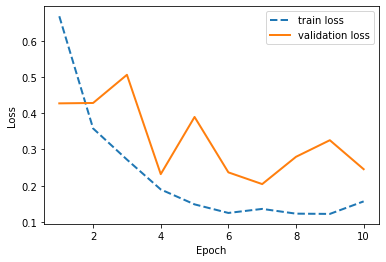

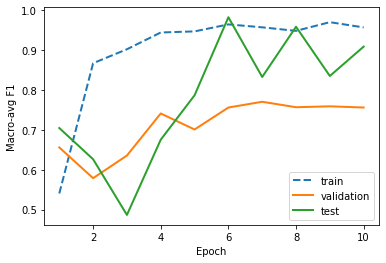

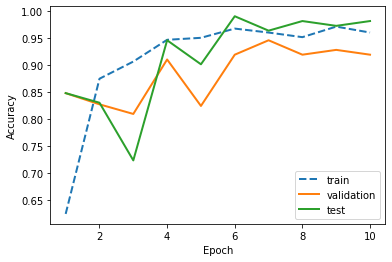

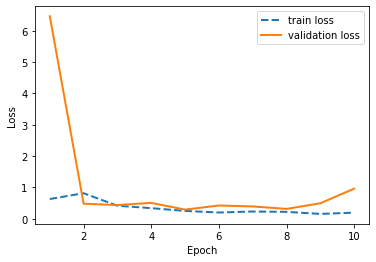

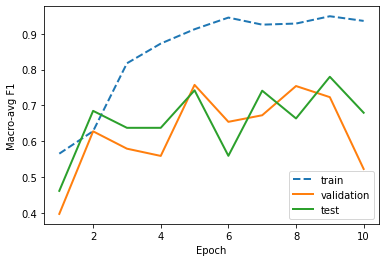

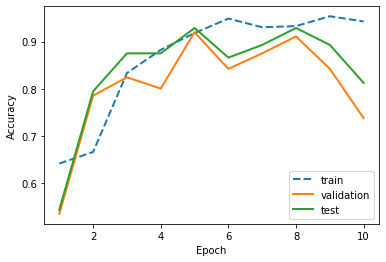

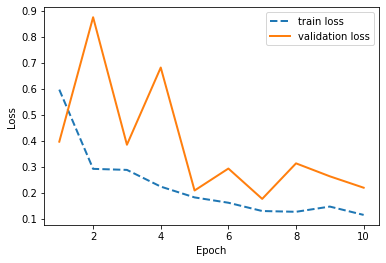

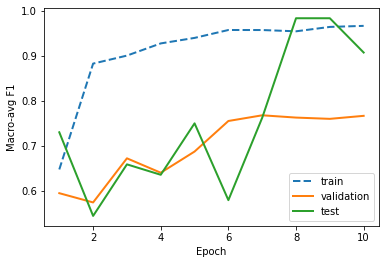

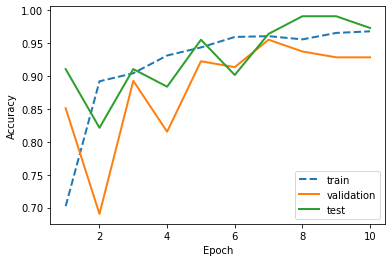

In [8]:
import wandb
HIDDEN_DIM = 300 #good
OUTPUT_DIM = 3
N_LAYERS = 2 #original good
#N_LAYERS = 3
BIDIRECTIONAL = True
#DROPOUT = 0.25 #original
DROPOUT = 0.5 #good

for eachtime in tqdm(range(3)):
    
    model = JointModel(long_roberta, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL,DROPOUT)
    model = model.to(device) 
    print(f'The model has {count_parameters(model):,} trainable parameters')
    for name, param in model.named_parameters():    
        #print(name)
        if name.startswith('bert') or name.startswith('long_roberta'):
            param.requires_grad = False
    

    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()
    criterion = criterion.to(device) 
    
    pt=makefolder('../Project2/pt_best/'+savingname+'_'+str(eachtime)+'/')
    pt_best=makefolder('../Project2/pt/'+savingname+'_'+str(eachtime)+'/')
    
    wandb.login()
    wandb.init(project='Project2_joint',name=savingname+'_'+str(eachtime))
    
    wandb.config = {
              "epochs": N_EPOCHS,
              "batch_size": batch_size
            }
    best_valid_loss = float('inf')
    per_epoch_train_loss = []
    per_epoch_val_loss = []
    per_epoch_train_f1 = []
    per_epoch_val_f1 = []
    per_epoch_train_acc = []
    per_epoch_val_acc = []
    
    for epoch in range(N_EPOCHS):

        start_time = time.time()

        train_loss, train_acc, train_f1 = train(model, train_dataloader, optimizer, criterion)
        valid_loss, valid_acc, valid_f1 = evaluate(model, validation_dataloader, criterion)

        end_time = time.time()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        per_epoch_train_loss.append(train_loss)
        per_epoch_val_loss.append(valid_loss)
        per_epoch_train_f1.append(train_f1)
        per_epoch_val_f1.append(valid_f1)
        per_epoch_train_acc.append(train_acc)
        per_epoch_val_acc.append(valid_acc)
        Val_aver_acc=mean(per_epoch_val_acc)
        Val_aver_f1=mean(per_epoch_val_f1)


        if valid_loss <= best_valid_loss:
            best_valid_loss = valid_loss
            print("best model saved in epoch :", epoch+1 )
            torch.save(model.state_dict(), pt_best +str(epoch+1)+'.pt')
        torch.save(model.state_dict(), pt +'/'+str(epoch+1)+'.pt')

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f} | Train macro-avg-f1: {train_f1*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f} |  Val. macro-avg-f1: {valid_f1*100:.2f}%')
        print(f'\t Aver. ACC: {Val_aver_acc*100:.2f}%')
        wandb.log({'Max Val Acc':max(per_epoch_val_acc),'Average Val. Acc': Val_aver_acc,'Val. accuracy': valid_acc, 'Val. loss': valid_loss,'Val. macro-avg-f1':valid_f1})


    Test_Acc = []
    Test_f1=[]
    for epoch in range(N_EPOCHS):
        model.load_state_dict(torch.load(pt+str(epoch+1)+'.pt')) 
        test_loss, test_acc, test_f1 = evaluate(model, test_dataloader, criterion)

        Test_Acc.append(test_acc)
        Test_f1.append(test_f1)
        Test_aver_acc=mean(Test_Acc)
        Test_test_f1=mean(Test_f1)
        print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f} | Test macro-avg-f1: {test_f1*100:.2f}%')
        print(f'\t Aver. TEST ACC: {Test_aver_acc*100:.2f}%')
        wandb.log({'Max TEST Acc':max(Test_Acc),'Average TEST Acc': Test_aver_acc,'Test accuracy': test_acc, 'Test loss': test_loss,'Test macro-avg-f1':Test_test_f1})
    wandb.finish()
    save_plots(per_epoch_train_loss, per_epoch_val_loss, per_epoch_train_f1, 
    per_epoch_val_f1, per_epoch_train_acc, per_epoch_val_acc,Test_Acc,Test_f1)
    
    

In [9]:
re=pd.DataFrame([[Val_aver_acc,Test_aver_acc, Val_aver_f1,Test_test_f1]],columns=['Avg. Val. Acc.','Avg. Test.Acc','Avg. Val. macro-avg-f1','Avg. Test. macro-avg-f1'])
re.to_csv('../Project2/'+file_name+'/News_classification_results.csv',index=None)

In [10]:
re

,Avg. Val. Acc.,Avg. Test.Acc,Avg. Val. macro-avg-f1,Avg. Test. macro-avg-f1
0,0.883631,0.930357,0.697638,0.75301
